In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_8658/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [1]:
import pandas as pd
from numpy import sqrt
from numpy import argmax
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random
from scipy import interp

In [2]:
X = pd.read_csv("/home/dsi/zuckerm1/r_files/All_Samples/data_fs_600.csv", index_col = 0)

In [5]:
X.head(2)

,CAVNTNAGKSTF,CAVNTGGFKTIF,CAVNTGNQFYF,CAENSGGSNYKLTF,CAVRDGDYKLSF,CAASGGSNYKLTF,CAVNQAGTALIF,CAVNSGGYQKVTF,CAENTGGFKTIF,CAVNRDDKIIF,...,CASSLVNEQFF,CASSTSTDTQYF,CASSVGGNTEAFF,CASSPGYEQYF,CAVSKAAGNKLTF,CALAGGTSYGKLTF,CASSLGTSTDTQYF,CAVPNDYKLSF,CAVVDSNYQLIW,y
1_A_B_H,0.000081,0.000121,0.00004,0.000161,0.000403,0.00000,0.000081,0.00004,0.00004,0.000000,...,0.0,0.000000,0.0,0.000161,0.0,0.0,0.0,0.0,0.0,0
1_A_B_OC,0.000000,0.000121,0.00000,0.000040,0.000282,0.00004,0.000040,0.00000,0.00000,0.000081,...,0.0,0.000081,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1


In [6]:
X.shape

(95, 601)

In [3]:
from atom import ATOMClassifier

/home/dsi/zuckerm1/anaconda3/envs/ovarian/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
atom = ATOMClassifier(X, y="y", test_size=0.25, verbose=2, warnings=False, random_state = 1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (95, 601)
Memory: 456.89 kB
Scaled: False
Outlier values: 895 (2.1%)
-------------------------------------
Train set size: 72
Test set size: 23
-------------------------------------
|   |    dataset |      train |       test |
| - | ---------- | ---------- | ---------- |
| 0 |   49 (1.1) |   37 (1.1) |   12 (1.1) |
| 1 |   46 (1.0) |   35 (1.0) |   11 (1.0) |



In [9]:
atom.classes

,dataset,train,test
0,49,37,12
1,46,35,11


SFM with XGB estimator

In [10]:
atom.branch = "sfm_xgb_10_from_master"

New branch sfm_xgb_10 successfully created.


In [11]:
atom.feature_selection(strategy="SFM", solver="XGB", n_features=10, random_state=0)

Fitting FeatureSelector...
Performing feature selection ...
 --> The XGBClassifier estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAASGGSNYKLTF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CAVNRDDKIIF.
   >>> Dropping feature CAVDTGRRALTF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAASNTGNQFYF.
   >>> Dropping feature CASSLGETQYF.
   >>> Dropping feature CAVSGGSNYKLTF.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >>> Dropping feature CAENAGGTSYGKLTF.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping feature CAVKTSYDKVIF.
   >>> Dropping feature 

In [12]:
atom.features

['CVVSDRGSTLGRLYF',
 'CAVNFGNEKLTF',
 'CASSLGGNTEAFF',
 'CAVNNAGNMLTF',
 'CAGAGGTSYGKLTF',
 'CASSLTGELFF',
 'CAVRDSNYQLIW',
 'CASSLGYNEQFF',
 'CASSLARNTEAFF',
 'CASSLVNEQFF']

In [14]:
atom.run(models=["GNB_xgb","LR_xgb", "lSVM_xgb", "kSVM_xgb", "Ridge_xgb", "SGD_xgb", "PA_xgb", "Perc_xgb", "LDA_xgb", "QDA_xgb", "KNN_xgb", "RNN_xgb", "AdaB_xgb", "RF_xgb", "XGB_xgb","LGB_xgb"], 
         n_calls=50,
         n_initial_points=10,
         metric="AUC",
         n_bootstrap=5)

# runtime: 64 min


Training ========================= >>
Models: GNB_xgb, LR_xgb, lSVM_xgb, kSVM_xgb, Ridge_xgb, SGD_xgb, PA_xgb, Perc_xgb, LDA_xgb, QDA_xgb, KNN_xgb, RNN_xgb, AdaB_xgb, RF_xgb, XGB_xgb, LGB_xgb
Metric: roc_auc


Results for Gaussian Naive Bayes:
Fit ---------------------------------------------
Train evaluation --> roc_auc: 0.9243
Test evaluation --> roc_auc: 0.7197
Time elapsed: 0.020s
Bootstrap ---------------------------------------
Evaluation --> roc_auc: 0.7061 ± 0.0337
Time elapsed: 0.055s
-------------------------------------------------
Total time: 0.076s


Running BO for Logistic Regression...
| call             | penalty |       C |  solver | max_iter | l1_ratio | roc_auc | best_roc_auc |    time | total_time |
| ---------------- | ------- | ------- | ------- | -------- | -------- | ------- | ------------ | ------- | ---------- |
| Initial point 1  |    none |     --- | newto.. |      999 |      --- |  0.7778 |       0.7778 |  4.765s |     4.786s |
| Initial point 2  |      l2

SFM with LGB estimator

In [11]:
atom.branch = "sfm_lgb_10_from_master"

New branch sfm_lgb_10 successfully created.


In [12]:
atom.feature_selection(strategy="SFM", solver="LGB", n_features=10, random_state=0)

Fitting FeatureSelector...
Performing feature selection ...
 --> The LGBMClassifier estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAASGGSNYKLTF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CAVNRDDKIIF.
   >>> Dropping feature CAVDTGRRALTF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAASNTGNQFYF.
   >>> Dropping feature CASSLGETQYF.
   >>> Dropping feature CAVSGGSNYKLTF.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >>> Dropping feature CAENAGGTSYGKLTF.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping feature CAVTGNQFYF.
   >>> Dropping feature C

In [13]:
atom.features

['CVVSDRGSTLGRLYF',
 'CAVKTSYDKVIF',
 'CASSLRETQYF',
 'CASSLGYEQYF',
 'CAVMDSSYKLIF',
 'CAVNNAGNMLTF',
 'CALYNFNKFYF',
 'CALRNTGGFKTIF',
 'CASSLGPYEQYF',
 'CASSLARNTEAFF']

In [14]:
atom.run(models=["GNB_lgb","LR_lgb", "lSVM_lgb", "kSVM_lgb", "Ridge_lgb", "SGD_lgb", "PA_lgb", "Perc_lgb", "LDA_lgb", "QDA_lgb", "KNN_lgb", "RNN_lgb", "AdaB_lgb", "RF_lgb", "XGB_lgb","LGB_lgb"], 
         n_calls=50,
         n_initial_points=10,
         metric="AUC",
         n_bootstrap=5)

# runtime: 45 min


Training ========================= >>
Models: GNB_lgb, LR_lgb, lSVM_lgb, kSVM_lgb, Ridge_lgb, SGD_lgb, PA_lgb, Perc_lgb, LDA_lgb, QDA_lgb, KNN_lgb, RNN_lgb, AdaB_lgb, RF_lgb, XGB_lgb, LGB_lgb
Metric: roc_auc


Results for Gaussian Naive Bayes:
Fit ---------------------------------------------
Train evaluation --> roc_auc: 0.9459
Test evaluation --> roc_auc: 0.7576
Time elapsed: 0.059s
Bootstrap ---------------------------------------
Evaluation --> roc_auc: 0.7439 ± 0.0752
Time elapsed: 0.212s
-------------------------------------------------
Total time: 0.273s


Running BO for Logistic Regression...
| call             | penalty |       C |  solver | max_iter | l1_ratio | roc_auc | best_roc_auc |    time | total_time |
| ---------------- | ------- | ------- | ------- | -------- | -------- | ------- | ------------ | ------- | ---------- |
Finished loading model, total used 100 iterations
| Initial point 1  |    none |     --- | newto.. |      999 |      --- |  0.8642 |       0.8642 |  

SFM with LR estimator

In [5]:
atom.branch = "sfm_lr_10_from_master"

New branch sfm_lr_10 successfully created.


In [6]:
atom.feature_selection(strategy="SFM", solver="LR", n_features=10, random_state=0)

Fitting FeatureSelector...
Performing feature selection ...
 --> The LogisticRegression estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAASGGSNYKLTF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CAVNRDDKIIF.
   >>> Dropping feature CAVDTGRRALTF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAASNTGNQFYF.
   >>> Dropping feature CASSLGETQYF.
   >>> Dropping feature CAVSGGSNYKLTF.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >>> Dropping feature CAENAGGTSYGKLTF.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping feature CAVKTSYDKVIF.
   >>> Dropping fea

In [7]:
atom.features

['CVVSDRGSTLGRLYF',
 'CAVMDSSYKLIF',
 'CAVRDQAGTALIF',
 'CAVMDSNYQLIW',
 'CAVRDSNYQLIW',
 'CAAMDSNYQLIW',
 'CAVRDNYGQNFVF',
 'CALSAARSSNTGKLIF',
 'CADHQNYGGSQGNLIF',
 'CAVLDSNYQLIW']

In [8]:
atom.run(models=["GNB_lr","LR_lr", "lSVM_lr", "kSVM_lr", "Ridge_lr", "SGD_lr", "PA_lr", "Perc_lr", "LDA_lr", "QDA_lr", "KNN_lr", "RNN_lr", "AdaB_lr", "RF_lr", "XGB_lr","LGB_lr"], 
         n_calls=50,
         n_initial_points=10,
         metric="AUC",
         n_bootstrap=5)


Training ========================= >>
Models: GNB_lr, LR_lr, lSVM_lr, kSVM_lr, Ridge_lr, SGD_lr, PA_lr, Perc_lr, LDA_lr, QDA_lr, KNN_lr, RNN_lr, AdaB_lr, RF_lr, XGB_lr, LGB_lr
Metric: roc_auc


Results for Gaussian Naive Bayes:
Fit ---------------------------------------------
Train evaluation --> roc_auc: 0.8749
Test evaluation --> roc_auc: 0.7083
Time elapsed: 0.019s
Bootstrap ---------------------------------------
Evaluation --> roc_auc: 0.6985 ± 0.0197
Time elapsed: 0.062s
-------------------------------------------------
Total time: 0.082s


Running BO for Logistic Regression...
| call             | penalty |       C |  solver | max_iter | l1_ratio | roc_auc | best_roc_auc |    time | total_time |
| ---------------- | ------- | ------- | ------- | -------- | -------- | ------- | ------------ | ------- | ---------- |
| Initial point 1  |    none |     --- | newto.. |      999 |      --- |  0.8272 |       0.8272 |  1.374s |     1.396s |
| Initial point 2  |      l2 |   0.087 |    

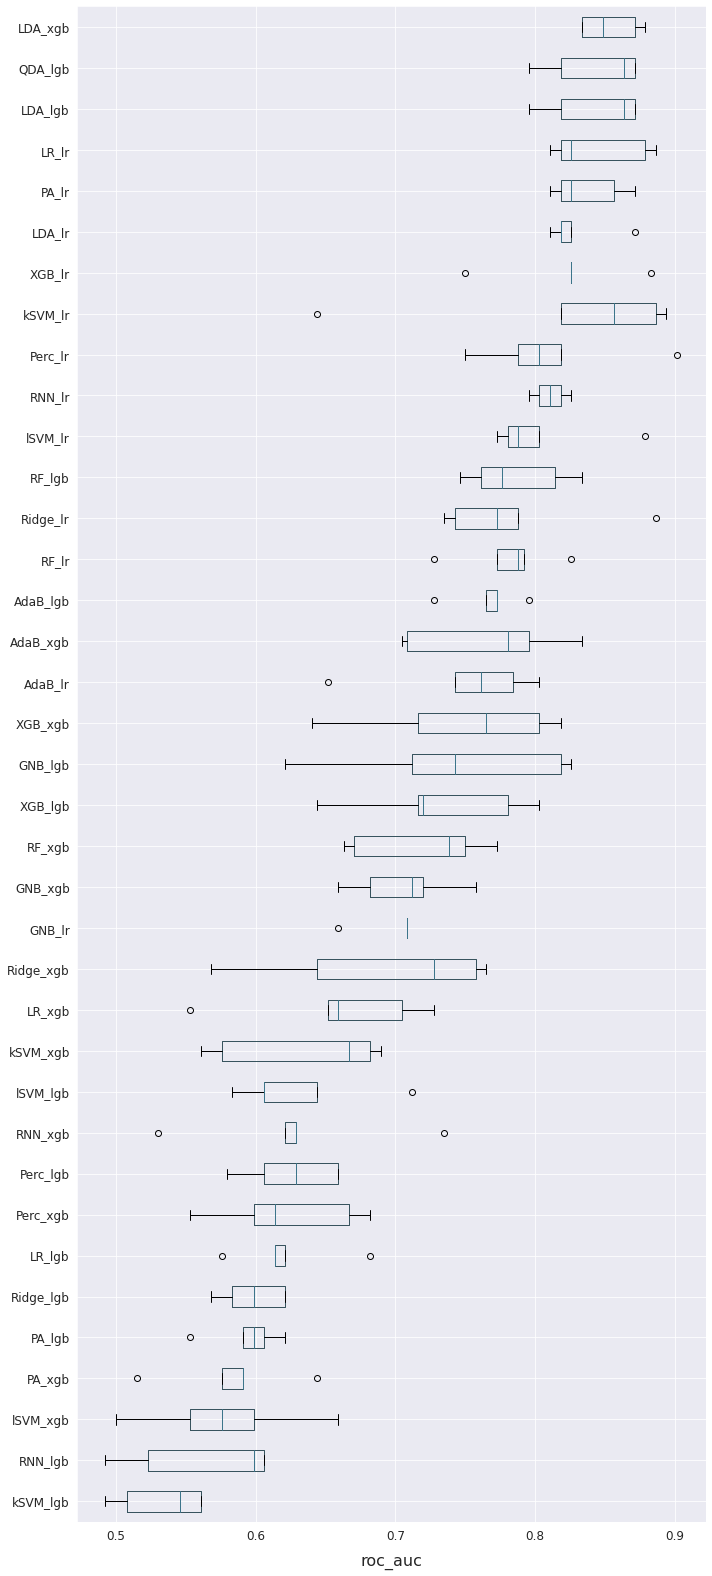

In [3]:
atom.plot_results()

In [27]:
atom.winner.results.to_frame().T

,metric_bo,time_bo,metric_train,metric_test,time_fit,mean_bootstrap,std_bootstrap,time_bootstrap,time
LDA_xgb,0.987654,2m:16s,0.930502,0.840909,0.014s,0.85303,0.018924,0.897s,2m:16s


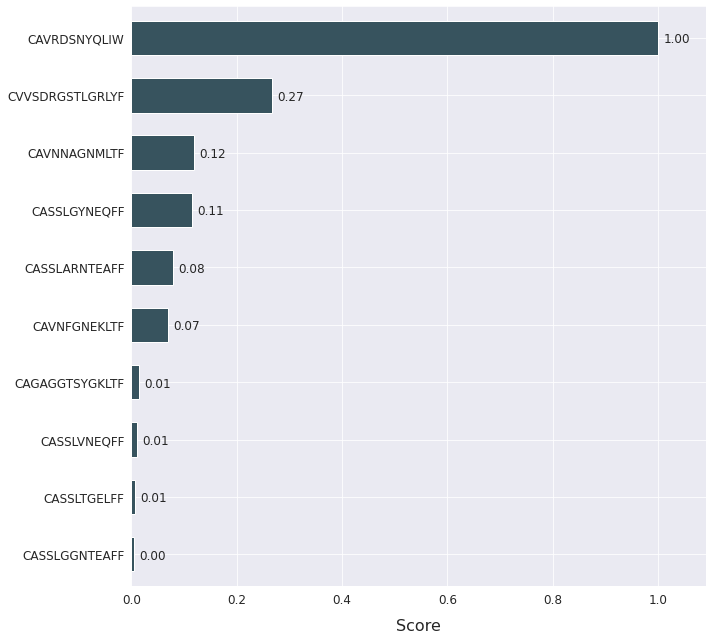

In [127]:
atom.winner.plot_feature_importance()

The above feature importance plot indicates that only 6 features are impacting the prediction, therefore we decided to start the process over while eliminating more features.

6 features

In [15]:
atom.branch = "sfm_sfs_6_from_master"
atom.feature_selection(strategy="SFM", solver="XGB", n_features=10, random_state=0)
atom.feature_selection(strategy="SFS", solver="LDA", n_features=6, random_state=0, direction = "backward")
atom.run(models=["LDA_6_2step"], 
         n_calls=50,
         n_initial_points=10,
         metric="AUC",
         n_bootstrap=5)

New branch sfm_sfs_6 successfully created.
Fitting FeatureSelector...
Performing feature selection ...
 --> The XGBClassifier estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAASGGSNYKLTF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CAVNRDDKIIF.
   >>> Dropping feature CAVDTGRRALTF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAASNTGNQFYF.
   >>> Dropping feature CASSLGETQYF.
   >>> Dropping feature CAVSGGSNYKLTF.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >>> Dropping feature CAENAGGTSYGKLTF.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping fea

In [28]:
atom.LDA_6_2step.results.to_frame().T

,metric_bo,time_bo,metric_train,metric_test,time_fit,mean_bootstrap,std_bootstrap,time_bootstrap,time
LDA_6_2step,0.975309,1m:18s,0.924324,0.818182,0.009s,0.825758,0.006776,0.027s,1m:18s


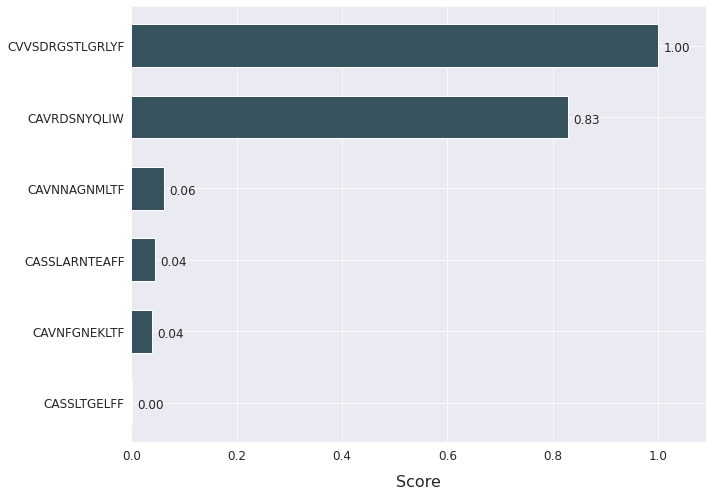

In [16]:
atom.LDA_6_2step.plot_feature_importance()

4 features

In [17]:
atom.branch = "sfm_sfs_4_from_master"
atom.feature_selection(strategy="SFM", solver="XGB", n_features=10, random_state=0)
atom.feature_selection(strategy="SFS", solver="LDA", n_features=4, random_state=0, direction = "backward")
atom.run(models=["LDA_4_2step"], 
         n_calls=50,
         n_initial_points=10,
         metric="AUC",
         n_bootstrap=5)

New branch sfm_sfs_4 successfully created.
Fitting FeatureSelector...
Performing feature selection ...
 --> The XGBClassifier estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAASGGSNYKLTF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CAVNRDDKIIF.
   >>> Dropping feature CAVDTGRRALTF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAASNTGNQFYF.
   >>> Dropping feature CASSLGETQYF.
   >>> Dropping feature CAVSGGSNYKLTF.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >>> Dropping feature CAENAGGTSYGKLTF.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping fea

In [29]:
atom.LDA_4_2step.results.to_frame().T

,metric_bo,time_bo,metric_train,metric_test,time_fit,mean_bootstrap,std_bootstrap,time_bootstrap,time
LDA_4_2step,0.962963,1m:20s,0.932819,0.837121,0.014s,0.834091,0.006061,0.046s,1m:20s


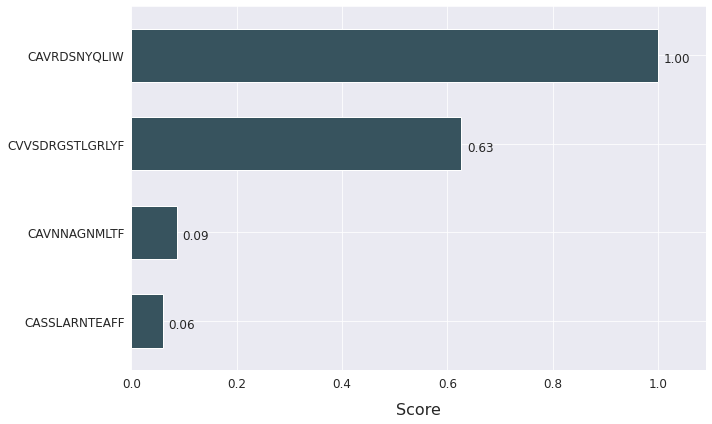

In [18]:
atom.LDA_4_2step.plot_feature_importance()

3 features

In [19]:
atom.branch = "sfm_sfs_3_from_master"
atom.feature_selection(strategy="SFM", solver="XGB", n_features=10, random_state=0)
atom.feature_selection(strategy="SFS", solver="LDA", n_features=3, random_state=0, direction = "backward")
atom.run(models=["LDA_3_2step"], 
         n_calls=50,
         n_initial_points=10,
         metric="AUC",
         n_bootstrap=5)

New branch sfm_sfs_3 successfully created.
Fitting FeatureSelector...
Performing feature selection ...
 --> The XGBClassifier estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAASGGSNYKLTF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CAVNRDDKIIF.
   >>> Dropping feature CAVDTGRRALTF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAASNTGNQFYF.
   >>> Dropping feature CASSLGETQYF.
   >>> Dropping feature CAVSGGSNYKLTF.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >>> Dropping feature CAENAGGTSYGKLTF.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping fea

In [30]:
atom.LDA_3_2step.results.to_frame().T

,metric_bo,time_bo,metric_train,metric_test,time_fit,mean_bootstrap,std_bootstrap,time_bootstrap,time
LDA_3_2step,0.95679,1m:20s,0.918533,0.837121,0.013s,0.837121,0.0,0.044s,1m:20s


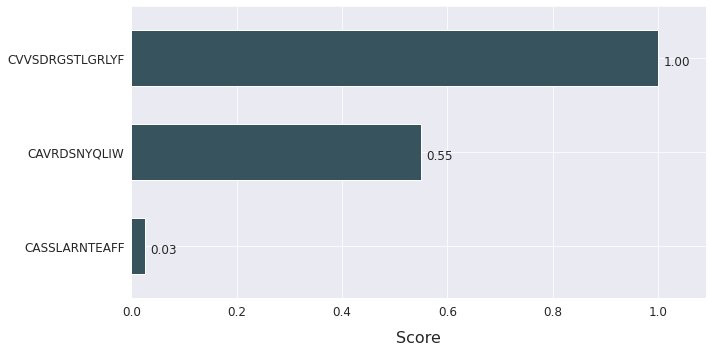

In [20]:
atom.LDA_3_2step.plot_feature_importance()

2 features

In [21]:
atom.branch = "sfm_sfs_2_from_master"
atom.feature_selection(strategy="SFM", solver="XGB", n_features=10, random_state=0)
atom.feature_selection(strategy="SFS", solver="LDA", n_features=2, random_state=0, direction = "backward")
atom.run(models=["LDA_2_2step"], 
         n_calls=50,
         n_initial_points=10,
         metric="AUC",
         n_bootstrap=5)

New branch sfm_sfs_2 successfully created.
Fitting FeatureSelector...
Performing feature selection ...
 --> The XGBClassifier estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAASGGSNYKLTF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CAVNRDDKIIF.
   >>> Dropping feature CAVDTGRRALTF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAASNTGNQFYF.
   >>> Dropping feature CASSLGETQYF.
   >>> Dropping feature CAVSGGSNYKLTF.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >>> Dropping feature CAENAGGTSYGKLTF.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping fea

In [31]:
atom.LDA_2_2step.results.to_frame().T

,metric_bo,time_bo,metric_train,metric_test,time_fit,mean_bootstrap,std_bootstrap,time_bootstrap,time
LDA_2_2step,0.95679,1m:21s,0.904633,0.833333,0.014s,0.833333,0.0,0.044s,1m:21s


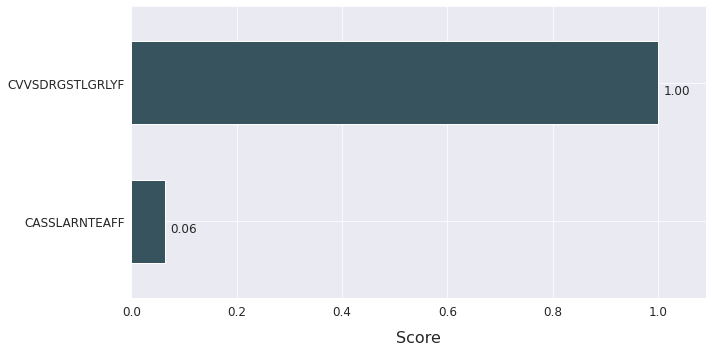

In [22]:
atom.LDA_2_2step.plot_feature_importance()

In [33]:
atom.results.sort_values(by=['mean_bootstrap'], ascending=False)[0:11]

,metric_bo,time_bo,metric_train,metric_test,time_fit,mean_bootstrap,std_bootstrap,time_bootstrap,time
LDA_xgb,0.987654,2m:16s,0.930502,0.840909,0.014s,0.853030,1.892424e-02,0.897s,2m:16s
LR_lr,1.000000,2m:39s,0.942085,0.840909,0.032s,0.843939,3.199805e-02,0.113s,2m:39s
QDA_lgb,0.975309,1m:16s,0.911969,0.871212,0.013s,0.843939,3.127237e-02,0.040s,1m:16s
LDA_lgb,0.975309,1m:28s,0.912741,0.871212,0.013s,0.843939,3.127237e-02,0.044s,1m:28s
LDA_3_2step,0.956790,1m:20s,0.918533,0.837121,0.013s,0.837121,1.110223e-16,0.044s,1m:20s
PA_lr,1.000000,2m:02s,0.937452,0.825758,0.022s,0.836364,2.327620e-02,0.080s,2m:02s
LDA_4_2step,0.962963,1m:20s,0.932819,0.837121,0.014s,0.834091,6.060606e-03,0.046s,1m:20s
LDA_2_2step,0.956790,1m:21s,0.904633,0.833333,0.014s,0.833333,0.000000e+00,0.044s,1m:21s
LDA_lr,0.987654,1m:32s,0.931274,0.818182,0.015s,0.828788,2.174652e-02,0.042s,1m:32s
LDA_6_2step,0.975309,1m:18s,0.924324,0.818182,0.009s,0.825758,6.775964e-03,0.027s,1m:18s


LDA_3_2step is ranked very high and uses 3 features only!

In [24]:
atom.save("atom_sfm_xgb_lgb_lr", save_data=True)

ATOMClassifier successfully saved.


In [14]:
from atom import ATOMLoader

atom = ATOMLoader("atom_sfm_xgb_lgb_lr", verbose=2)

ATOMClassifier successfully loaded.


In [25]:
atom.branch = "sfm_sfs_3"

Switched to branch sfm_sfs_3.


Create ROC curve for LDA on 9 splits of the data with 3 features.

1
<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (95, 4)
Memory: 3.17 kB
Scaled: False
Outlier values: 8 (2.8%)
Duplicate samples: 40 (42.1%)
-------------------------------------
Train set size: 72
Test set size: 23
-------------------------------------
|   |    dataset |      train |       test |
| - | ---------- | ---------- | ---------- |
| 0 |   49 (1.1) |   37 (1.1) |   12 (1.1) |
| 1 |   46 (1.0) |   35 (1.0) |   11 (1.0) |


Training ========================= >>
Models: LDA
Metric: roc_auc


Running BO for Linear Discriminant Analysis...
| call             |  solver | shrinkage | roc_auc | best_roc_auc |    time | total_time |
| ---------------- | ------- | --------- | ------- | ------------ | ------- | ---------- |
| Initial point 1  |   eigen |       1.0 |  0.9506 |       0.9506 |  0.011s |     0.016s |
| Initial point 2  |     svd |       --- |  0.8086 |       0.9506 |  0.010s |     0.773s

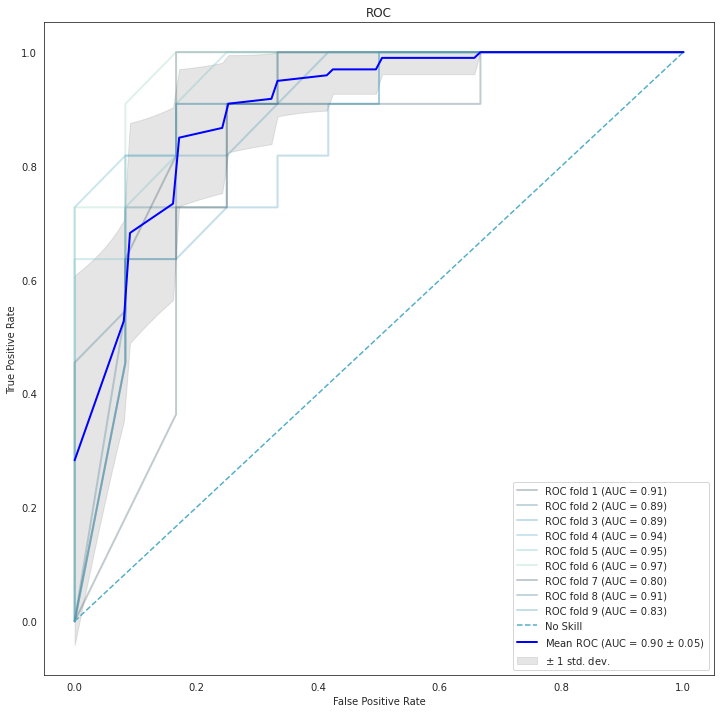

In [161]:
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(111)


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

for x in range(1,10):
    print(x)
    atom_2 = ATOMClassifier(atom.X, y=atom.y, test_size=(23/95), verbose=2, warnings=False, random_state = x)
    atom_2.run(models=["LDA"], 
         n_calls=50,
         n_initial_points=10,
         metric="AUC",
         n_bootstrap=5)

    # keep probabilities for the positive outcome only
    yhat = atom_2.winner.predict_proba_test[:, 1]
    # calculate roc curves
    fpr, tpr, threshold = roc_curve(atom_2.y_test, yhat)
    tprs.append(interp(mean_fpr, fpr, tpr)) 
    auc_score = roc_auc_score(atom_2.y_test, yhat)
    aucs.append(auc_score)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (x, auc_score))


plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, lw=2, alpha=1, color='blue', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

std_tpr = np.std(tprs, axis=0)
tprs_lower = mean_tpr - std_tpr
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color="grey", alpha=0.2, label=r"$\pm$ 1 std. dev.",)

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC')
ax.legend()
ax.set_facecolor('w')
#plt.show()
plt.savefig("roc_3.pdf", transparent= True)

In [35]:
atom.LDA_3_2step

Linear Discriminant Analysis
 --> Estimator: LinearDiscriminantAnalysis
 --> Evaluation: roc_auc: 0.8371

In [36]:
atom.LDA_3_2step.best_params

{'solver': 'lsqr', 'shrinkage': 1.0}

In [37]:
atom.LDA_3_2step.estimator.coef_

array([[-492.90849119, -270.95980127,  -13.12750647]])

In [38]:
atom.LDA_3_2step.results.to_frame().T

,metric_bo,time_bo,metric_train,metric_test,time_fit,mean_bootstrap,std_bootstrap,time_bootstrap,time
LDA_3_2step,0.95679,1m:20s,0.918533,0.837121,0.013s,0.837121,0.0,0.044s,1m:20s


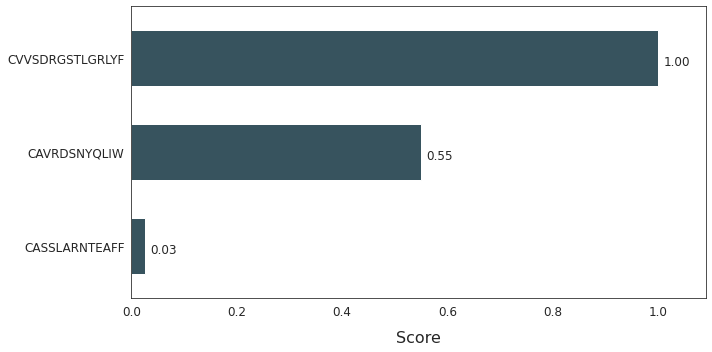

In [39]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
atom.style = "white"
atom.LDA_3_2step.plot_feature_importance(filename = "feat_3.pdf" )

Stats on LDA 10 features

In [40]:
# keep probabilities for the positive outcome only
yhat = atom.winner.predict_proba_test[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(atom.y_test, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.653083


In [41]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.653083, G-Mean=0.826


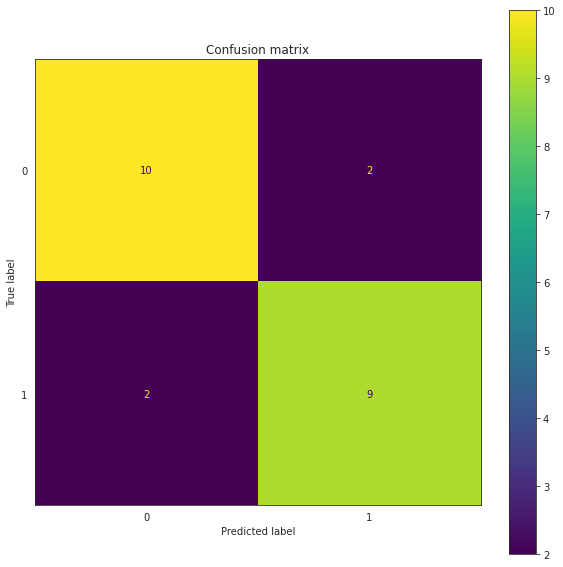

In [42]:
y_pred = (yhat >= best_thresh).astype('float')
cm = confusion_matrix(atom.y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.grid(False)
plt.title('Confusion matrix')
#plt.show()
plt.savefig("cm_10.pdf", transparent= True)

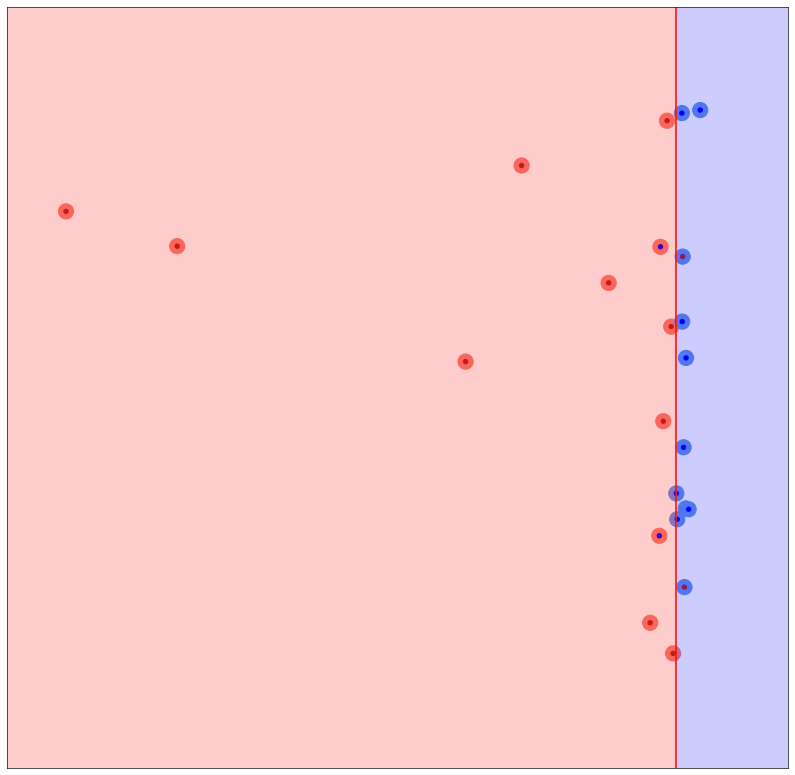

In [166]:
from matplotlib import pyplot as plt, patches
from random import sample
plt.rcParams["figure.figsize"] = [14.0, 14.0]
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

x = yhat
y = sample(range(4000, 6650), len(x))
y = [t/10000 for t in y]
real = atom.y_test.to_list()

ax = plt.gca()

for i in range(len(x)):
    # predicted positive- blue
    # predicted negative- red
    circle = plt.Circle((x[i], y[i]), 0.0035, color = 'salmon' if x[i] < best_thresh else 'cornflowerblue')
    ax.add_patch(circle)
    # actualy positive- blue
    # actualy negative- red
    incircle = plt.Circle((x[i], y[i]), 0.001, color='firebrick' if real[i] == 0 else 'blue')
    ax.add_patch(incircle)

ax.axis("equal")
plt.xlim(0.35, 0.7)
plt.ylim(0.35,0.7)
plt.axvline(x=best_thresh, color='red', linestyle='-')
ax.axvspan(0, best_thresh, facecolor='red', alpha=0.2)
ax.axvspan(best_thresh, 0.8, facecolor='blue', alpha=0.2)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
#plt.show()
plt.savefig("conf_10.pdf", transparent= True)




In [45]:
accuracy = accuracy_score(atom.y_test, y_pred)
F1 = f1_score(atom.y_test, y_pred)
precision = precision_score(atom.y_test, y_pred)
recall = recall_score(atom.y_test, y_pred)
roc_auc = roc_auc_score(atom.y_test, y_pred)
print('Accuracy=%f\nF1=%f\nPrecision=%f\nrecall=%f\nauc=%f' % (accuracy, F1, precision, recall,roc_auc))


Accuracy=0.826087
F1=0.818182
Precision=0.818182
recall=0.818182
auc=0.825758


stats on LDA 3 features

In [46]:
# keep probabilities for the positive outcome only
yhat = atom.LDA_3_2step.predict_proba_test[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(atom.y_test, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.621725


In [47]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.621725, G-Mean=0.870


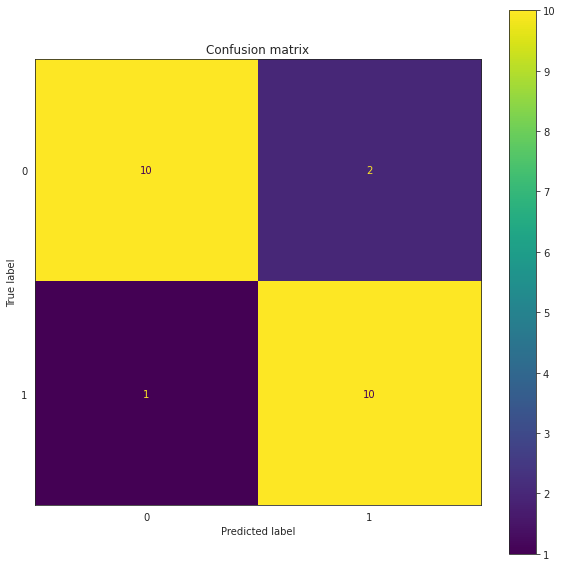

In [48]:
y_pred = (yhat >= best_thresh).astype('float')
cm = confusion_matrix(atom.y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.grid(False)
plt.title('Confusion matrix')
#plt.show()
plt.savefig("cm_3.pdf", transparent= True)

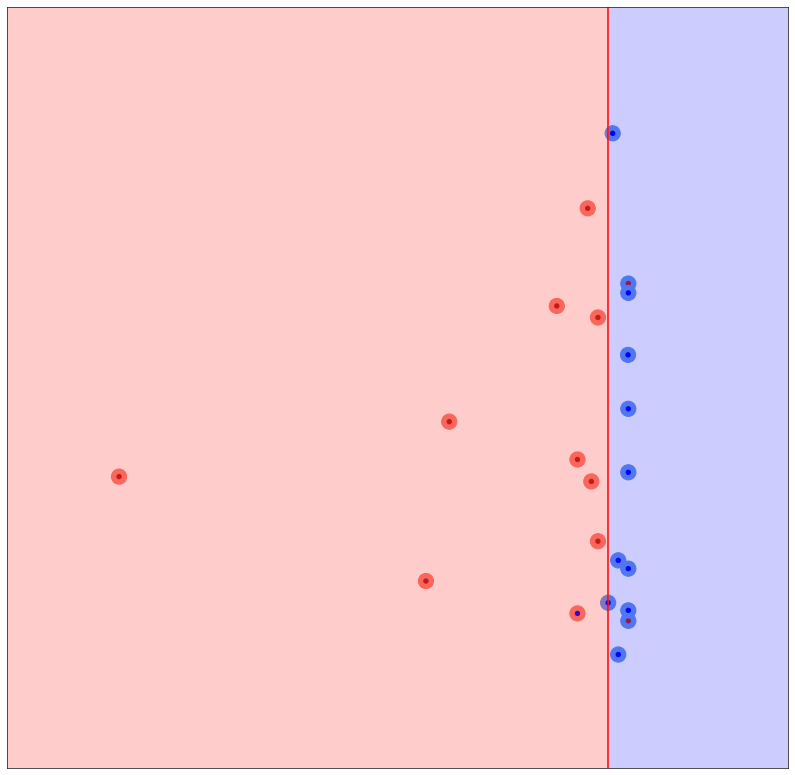

In [159]:
from matplotlib import pyplot as plt, patches
from random import sample
plt.rcParams["figure.figsize"] = [14.0, 14.0]
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

x = yhat
y = sample(range(4000, 6650), len(x))
y = [t/10000 for t in y]
real = atom.y_test.to_list()

ax = plt.gca()

for i in range(len(x)):
    # predicted positive- blue
    # predicted negative- red
    circle = plt.Circle((x[i], y[i]), 0.0035, color = 'salmon' if x[i] < best_thresh else 'cornflowerblue')
    ax.add_patch(circle)
    # actualy positive- blue
    # actualy negative- red
    incircle = plt.Circle((x[i], y[i]), 0.001, color='firebrick' if real[i] == 0 else 'blue')
    ax.add_patch(incircle)

ax.axis("equal")
plt.xlim(0.35, 0.7)
plt.ylim(0.35,0.7)
plt.axvline(x=best_thresh, color='red', linestyle='-')
ax.axvspan(0, best_thresh, facecolor='red', alpha=0.2)
ax.axvspan(best_thresh, 0.8, facecolor='blue', alpha=0.2)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
#plt.show()
plt.savefig("conf_3.pdf", transparent= True)

In [51]:
accuracy = accuracy_score(atom.y_test, y_pred)
F1 = f1_score(atom.y_test, y_pred)
precision = precision_score(atom.y_test, y_pred)
recall = recall_score(atom.y_test, y_pred)
roc_auc = roc_auc_score(atom.y_test, y_pred)
print('Accuracy=%f\nF1=%f\nPrecision=%f\nrecall=%f\nauc=%f' % (accuracy, F1, precision, recall,roc_auc))


Accuracy=0.869565
F1=0.869565
Precision=0.833333
recall=0.909091
auc=0.871212


Results on test set for this model are better.